# Module 1: Data Acquisition and Preprocessing 

## import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Dataset Loading

In [1]:
data=pd.read_csv('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code')

NameError: name 'pd' is not defined

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking Number of columns and rows in dataset

In [8]:
data.shape

(284807, 31)

## Getting dataset info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Cleaning data

In [13]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Analysing Data

In [15]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

492 transactions are fraud

284315 transactions are normal

## Separating Fraudant and Normal transactions

In [18]:
fraud=data[data.Class == 1]
normal=data[data.Class == 0]

In [19]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Analysis both classes separately

In [21]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [22]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Creating new dataset

### New dataset contain the same sample for normal as used for fraudant transactions (i.e 492). Now generating normal sample of 492

In [25]:
normal_sample = normal.sample(n=492)

### Here we generating new dataset of normal and fraud transaction sample of same size (i.e 492)

In [27]:
new_dataset = pd.concat([normal_sample, fraud], axis=0)

## Analysing New Dataset

In [29]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245449,152758.0,1.752139,-0.344539,-0.651660,0.881538,0.648462,1.957766,-0.669898,0.609200,0.512396,...,-0.084550,-0.128294,0.417484,-0.793556,-0.564571,-0.915703,0.095241,-0.036997,37.95,0
199309,132901.0,2.007458,-0.123930,-1.012713,0.326846,-0.154986,-0.947079,0.071390,-0.181251,0.310657,...,-0.232502,-0.590088,0.339737,0.071178,-0.349862,0.173192,-0.076472,-0.069204,4.49,0
122356,76529.0,1.337924,0.550019,-0.443867,0.900627,0.530684,-0.691392,0.597942,-0.355818,-0.365204,...,-0.041650,-0.009721,-0.259885,-0.408536,0.997057,-0.247509,-0.002700,0.004386,1.00,0
241143,150902.0,-0.795448,-1.141526,-4.137579,-1.614262,-0.475415,0.699104,-0.471123,-6.208071,-1.817926,...,-1.911703,1.950377,-3.940245,0.368749,-1.113561,-0.172635,0.814933,0.356220,1000.00,0
21931,31942.0,1.299990,-0.489392,0.147205,-0.519234,-0.929233,-0.695255,-0.729257,0.023396,-0.545552,...,0.075076,0.060547,0.022721,-0.032827,0.240476,-0.251537,0.032875,0.043912,34.90,0


In [30]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [31]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93960.886179,-0.050358,-0.050270,-0.125331,0.032267,0.004318,-0.022069,-0.076403,-0.010885,-0.026757,...,-0.019813,-0.048137,-0.007464,0.016294,-0.022616,0.048717,-0.051614,0.037281,-0.025438,85.483476
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [32]:
# Model 

### Extracting the values for x and y from dataset by droping class column for x value

In [34]:
x_value = new_dataset.drop(columns='Class', axis=1)
y_value = new_dataset['Class']

## Splitting Dataset into training and testing

### splits the dataset into 80% training and 20% testing sets, with a fixed random seed (11) for reproducibility.

### splits a dataset into training and testing sets using the train_test_split function from the sklearn.model_selection.

### x_train: The training data for features.
### x_test: The testing data for features.
### y_train: The training data for labels (target values).
### y_test: The testing data for labels.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_value,y_value, test_size=0.2, random_state=11)

# Applying Model

### Selecting Logistic Regression as model for prediction

In [41]:
model = LogisticRegression(max_iter =1000)

### When directly fitting the training data to model there is a warning that max_iter was reached and model does not converage. To resolve the warning we scale the training data using standard scaler feature of sklearn.preprocessing so that model trains well and converge.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)



### Model Trainnning

In [45]:
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [47]:
training_pridict = model.predict(x_train)
training_score = accuracy_score(training_pridict, y_train)

C:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [48]:
training_score

0.49428208386277

In [49]:
testing_predict = model.predict(x_test)
testing_score = accuracy_score(testing_predict, y_test)

C:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [50]:
testing_score

0.5279187817258884

### Refining model implementation

#### At this point the model result are not satisfying. To achieve maximum compatibility of model we planned to refine our model implementation so that model gives maximum accuracy

In [53]:
# rus = RandomUnderSampler(random_state=42)
# X_res, y_res = rus.fit_resample(X, y)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=11)
x_ros, y_ros = ros.fit_resample(x_value, y_value)


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_ros,y_ros, test_size=0.2, random_state=11)

In [55]:
model.fit(x_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [56]:
training_pridict_again = model.predict(x_train)
training_score_again = accuracy_score(training_pridict_again, y_train)

In [57]:
training_score_again

0.9567979669631512

In [58]:
testing_predict_again = model.predict(x_test)
testing_score_again = accuracy_score(testing_predict_again, y_test)

In [59]:
testing_score_again

0.9390862944162437

### Model Report

In [61]:
from sklearn.metrics import accuracy_score, f1_score, recall_score,classification_report,confusion_matrix


In [62]:

print (classification_report (y_ros , model.predict (x_ros)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       492
           1       0.98      0.93      0.95       492

    accuracy                           0.95       984
   macro avg       0.95      0.95      0.95       984
weighted avg       0.95      0.95      0.95       984



### Applying Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100)

In [66]:
y_pred = model2.predict(x_test)

In [67]:
score = accuracy_score(y_pred, y_test)

In [68]:
score

0.9390862944162437

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.95      0.92      0.93        93

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



### Applying Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [72]:
model3=dtc.fit(x_train,y_train)

In [73]:
y_pred=model3.predict(x_test)

In [74]:
score = accuracy_score(y_pred, y_test)

In [75]:
score

0.868020304568528

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       104
           1       0.83      0.91      0.87        93

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197



### Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=11)

# Train the model on the training data
gb_model.fit(x_train, y_train)

# Make predictions on the test set
gb_y_pred = gb_model.predict(x_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_y_pred))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_y_pred))


Gradient Boosting Classifier Accuracy: 0.9543147208121827
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       104
           1       0.96      0.95      0.95        93

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

Gradient Boosting Confusion Matrix:
 [[100   4]
 [  5  88]]


### Support Vector Machine (SVM)

In [80]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scaling features for SVM (as SVM is sensitive to feature scales)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the Support Vector Classifier
svm_model = SVC(kernel='rbf', C=1, gamma='auto', random_state=42)

# Train the model on the scaled training data
svm_model.fit(x_train_scaled, y_train)

# Make predictions on the scaled test set
svm_y_pred = svm_model.predict(x_test_scaled)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))


SVM Accuracy: 0.934010152284264
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.94      0.91      0.93        93

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

SVM Confusion Matrix:
 [[99  5]
 [ 8 85]]


### Confusion Matrix for all models

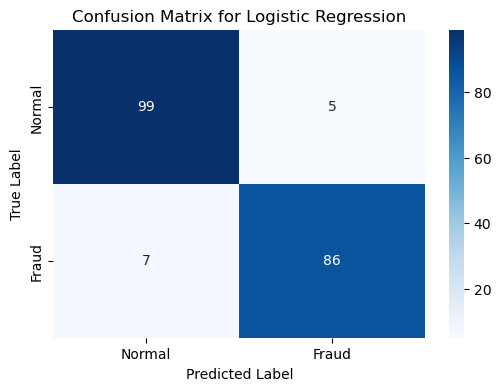

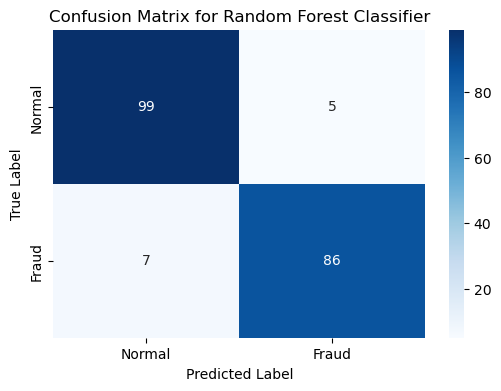

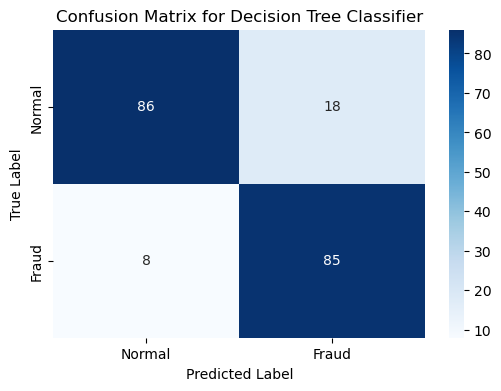

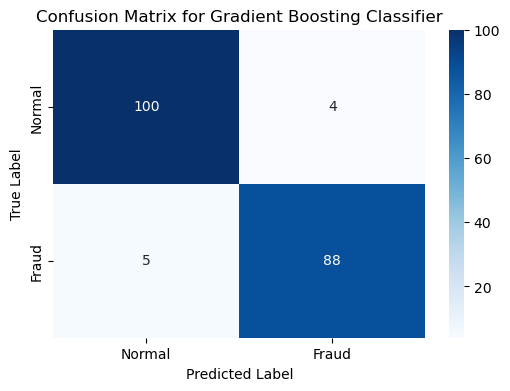

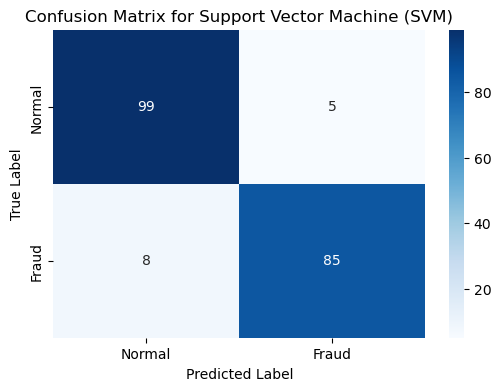

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Logistic Regression Confusion Matrix
logistic_y_pred = model.predict(x_test)  
plot_confusion_matrix(y_test, logistic_y_pred, "Logistic Regression")

# Random Forest Confusion Matrix
random_forest_y_pred = model2.predict(x_test)  
plot_confusion_matrix(y_test, random_forest_y_pred, "Random Forest Classifier")

# Decision Tree Confusion Matrix
decision_tree_y_pred = model3.predict(x_test)  
plot_confusion_matrix(y_test, decision_tree_y_pred, "Decision Tree Classifier")

# Gradient Boosting Confusion Matrix
gb_y_pred = gb_model.predict(x_test)  
plot_confusion_matrix(y_test, gb_y_pred, "Gradient Boosting Classifier")

# Support Vector Machine Confusion Matrix
svm_y_pred = svm_model.predict(x_test_scaled) 
plot_confusion_matrix(y_test, svm_y_pred, "Support Vector Machine (SVM)")
